In [1]:
!pip install pandas

In [2]:
!pip install xgboost

In [3]:
from xgboost import XGBRegressor

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

In [5]:
df = pd.read_csv('pubg.csv')

In [6]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [7]:
df.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [8]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [9]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [10]:
# Assuming df is your DataFrame
df = pd.read_csv('pubg.csv')

# Detect duplicates
duplicates = df[df.duplicated()]

# Display duplicates
print("Duplicate rows:")
print(duplicates)

# Remove duplicates
df = df.drop_duplicates()

# Confirming removal of duplicates
print("Duplicates removed. Updated DataFrame:")
print(df)

Duplicate rows:
Empty DataFrame
Columns: [Id, groupId, matchId, assists, boosts, damageDealt, DBNOs, headshotKills, heals, killPlace, killPoints, kills, killStreaks, longestKill, matchDuration, matchType, maxPlace, numGroups, rankPoints, revives, rideDistance, roadKills, swimDistance, teamKills, vehicleDestroys, walkDistance, weaponsAcquired, winPoints, winPlacePerc]
Index: []

[0 rows x 29 columns]
Duplicates removed. Updated DataFrame:
                     Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d

In [11]:
# Read the original file into DataFrame
df = pd.read_csv('pubg.csv')

# Remove duplicates from the DataFrame
df = df.drop_duplicates()

# Specify the path for the new file
new_file_path = 'pubg_updated.csv'

# Write the updated DataFrame to the new file
df.to_csv(new_file_path, index=False)

# Replace the old file with the new one
os.replace(new_file_path, 'pubg.csv')

# Confirming the replacement
print("Old file replaced with the updated one.")

Old file replaced with the updated one.


In [12]:
# Read the data from the CSV file into a DataFrame
df = pd.read_csv('pubg.csv')

# Display the first few rows of the DataFrame
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [13]:
df.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [14]:
title_list = df.columns.tolist()
print(title_list)

['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']


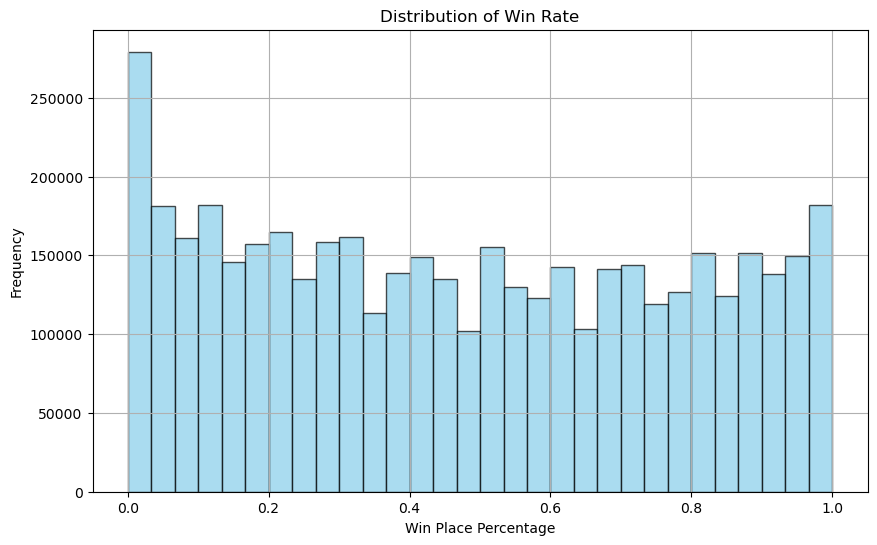

In [15]:
# Selecting the 'winPlacePerc' column
win_rate_data = df['winPlacePerc']

# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(win_rate_data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Win Rate')
plt.xlabel('Win Place Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\yayan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


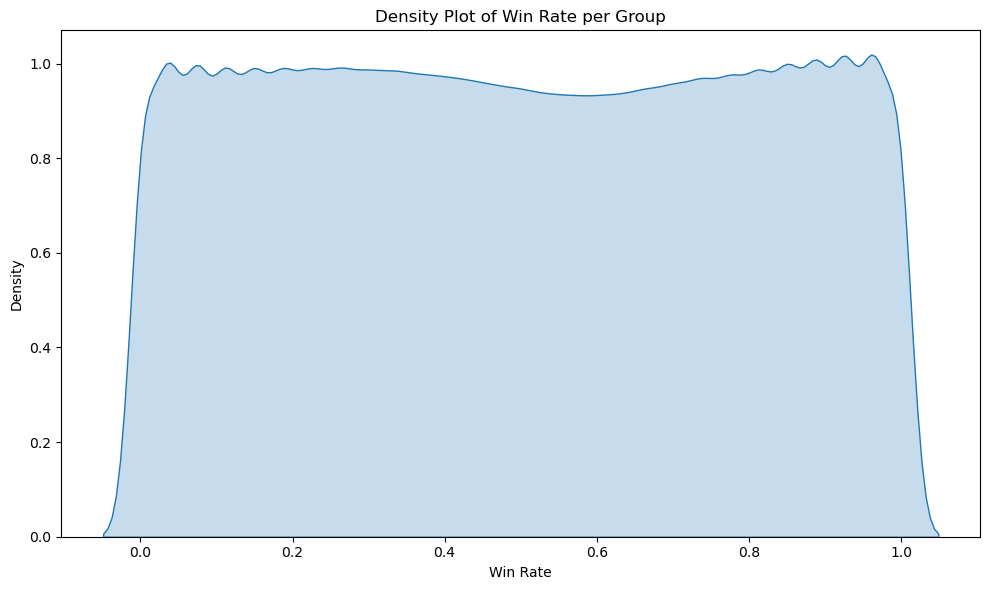

In [16]:
# Load the data
df = pd.read_csv('pubg.csv')

# Calculate win rate per group
win_rate_per_group = df.groupby('groupId')['winPlacePerc'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(data=win_rate_per_group['winPlacePerc'], fill=True)
plt.title('Density Plot of Win Rate per Group')
plt.xlabel('Win Rate')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

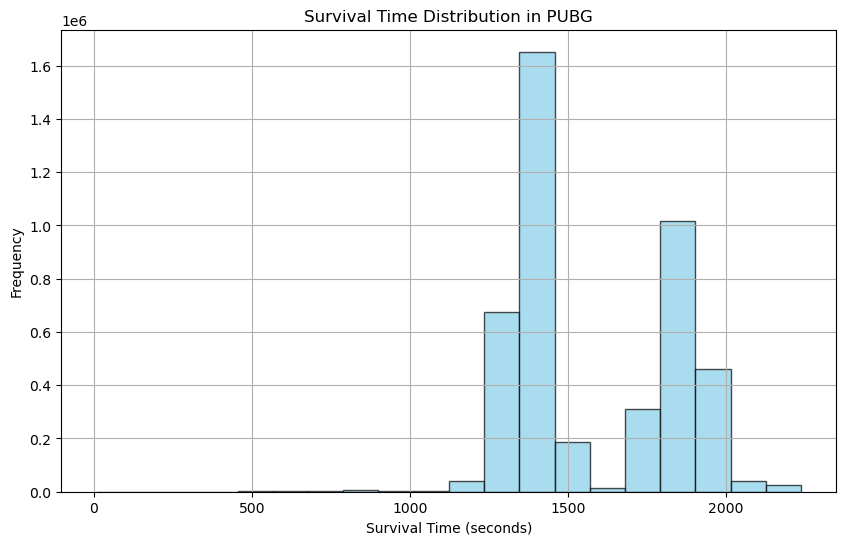

In [17]:
# Load the data
df = pd.read_csv('pubg.csv')

# Remove duplicate rows
df = df.drop_duplicates()

# Plot histogram of match durations (survival times)
plt.figure(figsize=(10, 6))
plt.hist(df['matchDuration'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Survival Time Distribution in PUBG')
plt.xlabel('Survival Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

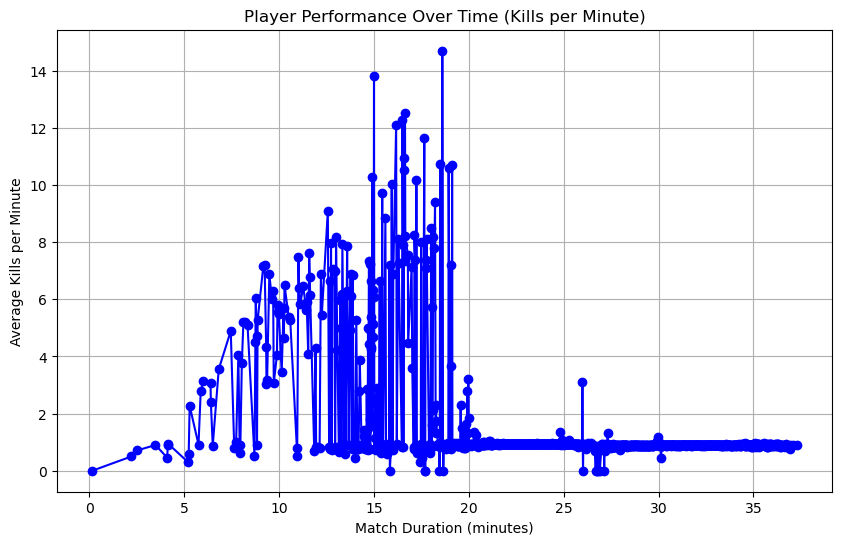

In [18]:
# Load the data
df = pd.read_csv('pubg.csv')

# Convert 'matchDuration' to minutes for easier interpretation
df['matchDuration_minutes'] = df['matchDuration'] / 60

# Group data by 'matchDuration_minutes' and calculate the average kills per minute
player_performance = df.groupby('matchDuration_minutes')['kills'].mean().reset_index()

# Plot player performance over time (kills per minute)
plt.figure(figsize=(10, 6))
plt.plot(player_performance['matchDuration_minutes'], player_performance['kills'], marker='o', color='b', linestyle='-')
plt.title('Player Performance Over Time (Kills per Minute)')
plt.xlabel('Match Duration (minutes)')
plt.ylabel('Average Kills per Minute')
plt.grid(True)
plt.show()

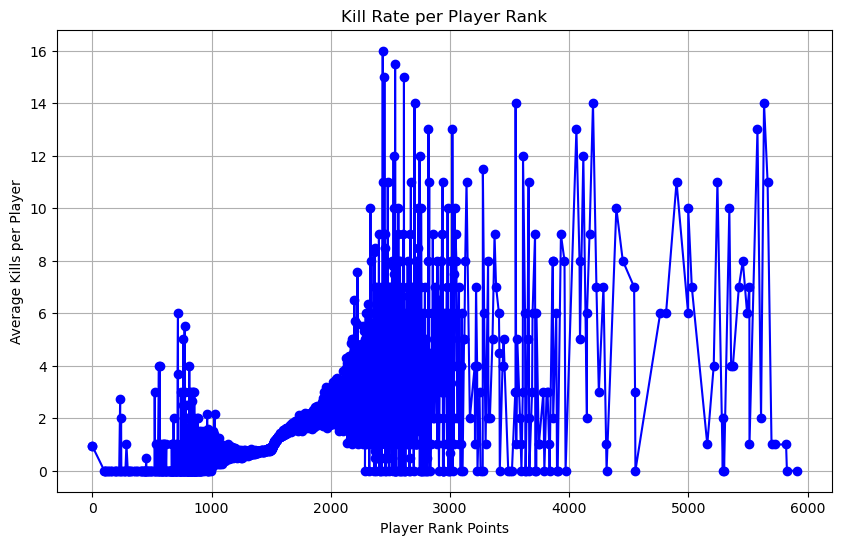

In [19]:
# Load the data
df = pd.read_csv('pubg.csv')

# Group data by 'rankPoints' and calculate the average kills per player rank
kill_rate_per_rank = df.groupby('rankPoints')['kills'].mean().reset_index()

# Plot kill rate per player rank
plt.figure(figsize=(10, 6))
plt.plot(kill_rate_per_rank['rankPoints'], kill_rate_per_rank['kills'], marker='o', color='b', linestyle='-')
plt.title('Kill Rate per Player Rank')
plt.xlabel('Player Rank Points')
plt.ylabel('Average Kills per Player')
plt.grid(True)
plt.show()

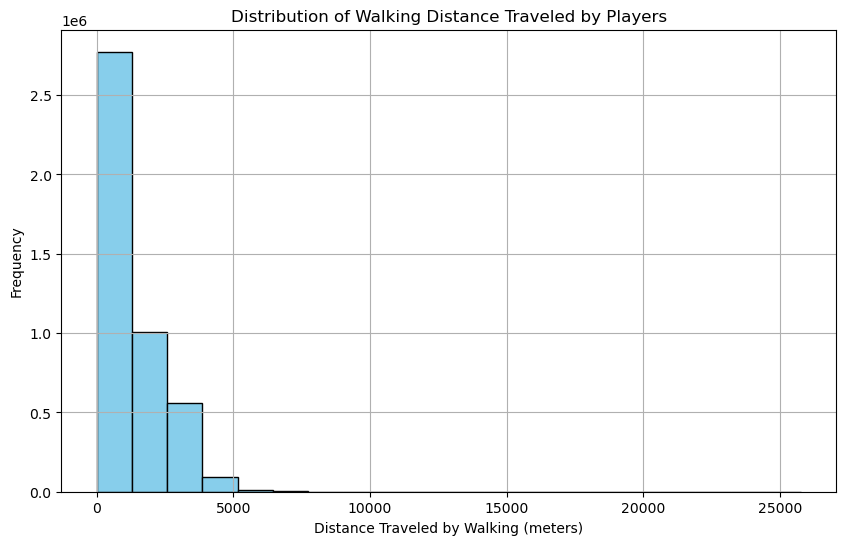

Average Walking Distance Traveled: 1154.22 meters


In [20]:
# Read the PUBG data from CSV file
df = pd.read_csv('pubg.csv')

# Plot a histogram to visualize the distribution of distances traveled
plt.figure(figsize=(10, 6))
plt.hist(df['walkDistance'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Walking Distance Traveled by Players')
plt.xlabel('Distance Traveled by Walking (meters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate and visualize the average distance traveled by walking
average_walk_distance = df['walkDistance'].mean()
print("Average Walking Distance Traveled: {:.2f} meters".format(average_walk_distance))

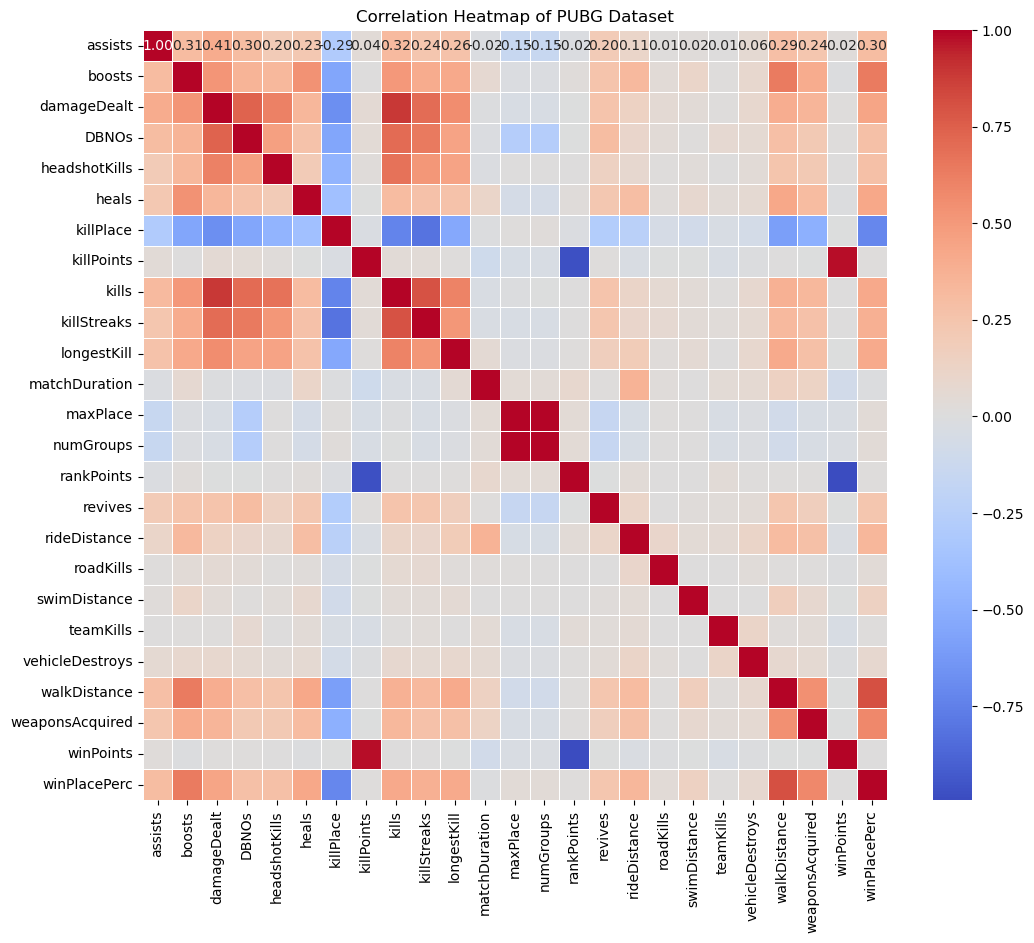

In [21]:
# Load the dataset
df = pd.read_csv('pubg.csv')

# Select numeric columns for heatmap
numeric_cols = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of PUBG Dataset')
plt.show()

In [22]:
# Load the dataset
df = pd.read_csv('pubg.csv')

# Display column data types
print(df.dtypes)

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object


In [23]:
data = {
    'Id': ['1', '2', '3'],
    'groupId': ['abc', 'def', 'ghi'],
    'matchId': ['xyz', 'xyz', 'xyz'],
    'assists': [1, 2, 3],
    'boosts': [2, 3, 1],
    'damageDealt': ['102.5', '95.2', '78.9'],  # Example string column to convert
    'DBNOs': [0, 1, 0],
    # Include other columns as per your actual DataFrame
    'winPlacePerc': [0.5, 0.7, 0.2]
}

df = pd.DataFrame(data)

# List of columns to convert from string to float
columns_to_convert = ['damageDealt']

# Convert specified columns from string to float
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Coerce errors to NaN if conversion fails

# Print the DataFrame to verify conversion
print(df)

  Id groupId matchId  assists  boosts  damageDealt  DBNOs  winPlacePerc
0  1     abc     xyz        1       2        102.5      0           0.5
1  2     def     xyz        2       3         95.2      1           0.7
2  3     ghi     xyz        3       1         78.9      0           0.2


In [24]:
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('pubg.csv')

# Define features (X) and target variable (y)
X = df.drop(columns=['winPlacePerc'])  # Features
y = df['winPlacePerc']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3557572, 28)
X_test shape: (889394, 28)
y_train shape: (3557572,)
y_test shape: (889394,)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('pubg.csv')

# Define features (X) and target variable (y)
X = df.drop(columns=['winPlacePerc'])  # Features
y = df['winPlacePerc']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Print the transformed feature names
feature_names = preprocessor.fit_transform(X_train)
print(feature_names)

  (0, 0)	1.3019126736125992
  (0, 1)	-0.6452041633291122
  (0, 2)	-0.7650305718417146
  (0, 3)	-0.5741958578366548
  (0, 4)	-0.3762915042441223
  (0, 5)	-0.5116855216110422
  (0, 6)	1.1801295208210894
  (0, 7)	-0.8049122155209866
  (0, 8)	-0.5931345329531804
  (0, 9)	-0.7653476982451778
  (0, 10)	-0.4510474114450905
  (0, 11)	1.118732229689268
  (0, 12)	-0.7764327179205618
  (0, 13)	-0.7730441581639219
  (0, 14)	0.35718626969126094
  (0, 15)	1.766534117413964
  (0, 16)	-0.40474845763808825
  (0, 17)	-0.04789251858072312
  (0, 18)	-0.14804644767810227
  (0, 19)	-0.14243467227911993
  (0, 20)	-0.08532616652606304
  (0, 21)	-0.8259795574823676
  (0, 22)	-0.6763349864299568
  (0, 23)	-0.8200062178511008
  (0, 1347373)	1.0
  :	:
  (3557571, 3)	-0.5741958578366548
  (3557571, 4)	-0.3762915042441223
  (3557571, 5)	-0.5116855216110422
  (3557571, 6)	0.01488422324246202
  (3557571, 7)	-0.8049122155209866
  (3557571, 8)	-0.5931345329531804
  (3557571, 9)	-0.7653476982451778
  (3557571, 10)	-0.45

In [26]:
from sklearn.preprocessing import StandardScaler

# Create a new feature 'totalDistance' by combining rideDistance, walkDistance, and swimDistance
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

# Create a feature 'headshot_rate' to represent the ratio of headshotKills to kills
df['headshot_rate'] = df['headshotKills'] / df['kills'].replace(0, 1)  # Handle division by zero

# Transforming matchDuration to minutes
df['matchDuration_min'] = df['matchDuration'] / 60.0

# Log transformation of damageDealt to handle skewness
df['log_damageDealt'] = df['damageDealt'].apply(lambda x: np.log(x + 1))

# Scaling numeric features (e.g., using StandardScaler)
scaler = StandardScaler()
numeric_features = ['totalDistance', 'matchDuration_min', 'log_damageDealt']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Encoding categorical features (e.g., matchType using one-hot encoding)
df = pd.get_dummies(df, columns=['matchType'])

# Drop original columns if needed
# df.drop(['rideDistance', 'walkDistance', 'swimDistance', 'matchDuration', 'damageDealt'], axis=1, inplace=True)

# Splitting data into features (X) and target (y)
X = df.drop(['Id', 'groupId', 'matchId', 'winPlacePerc'], axis=1)
y = df['winPlacePerc']

# Now X contains the engineered features and is ready for modeling

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load data from CSV
df = pd.read_csv('pubg.csv')

# Select features (X) and target variable (y)
X = df[['boosts', 'damageDealt', 'killPlace', 'walkDistance']]
y = df['winPlacePerc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in y_train using SimpleImputer
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train_imputed)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

Mean Squared Error (MSE): 0.0229
R-squared (R2): 0.7576


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load data from CSV
df = pd.read_csv('pubg.csv')

# Select features (X) and target variable (y)
X = df[['boosts', 'damageDealt', 'killPlace', 'walkDistance']]
y = df['winPlacePerc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in y_train and y_test using SimpleImputer
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train_imputed)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test_imputed, y_pred)
r2 = r2_score(y_test_imputed, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

Mean Squared Error (MSE): 0.0136
R-squared (R2): 0.8561


In [29]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load data from CSV
df = pd.read_csv('pubg.csv')

# Select features (X) and target variable (y)
X = df[['boosts', 'damageDealt', 'killPlace', 'walkDistance']]
y = df['winPlacePerc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in y_train and y_test using SimpleImputer
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).flatten()

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression, no activation function
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',  # For regression tasks
              metrics=['mae'])  # Mean Absolute Error as additional metric

# Fit the model on the training data with reduced epochs
history = model.fit(X_train, y_train_imputed,
                    epochs=20,  # Reduced number of epochs
                    batch_size=32,
                    validation_data=(X_test, y_test_imputed))

# Predict on the testing data
y_pred = model.predict(X_test).flatten()

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test_imputed, y_pred)
r2 = r2_score(y_test_imputed, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

C:\Users\yayan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
111175/111175 ━━━━━━━━━━━━━━━━━━━━ 168s 1ms/step - loss: 4.5656 - mae: 0.3860 - val_loss: 0.0157 - val_mae: 0.0899
Epoch 2/20
111175/111175 ━━━━━━━━━━━━━━━━━━━━ 165s 1ms/step - loss: 0.0150 - mae: 0.0885 - val_loss: 0.0142 - val_mae: 0.0863
Epoch 3/20
111175/111175 ━━━━━━━━━━━━━━━━━━━━ 165s 1ms/step - loss: 0.0143 - mae: 0.0857 - val_loss: 0.0139 - val_mae: 0.0841
Epoch 4/20
111175/111175 ━━━━━━━━━━━━━━━━━━━━ 164s 1ms/step - loss: 0.0140 - mae: 0.0848 - val_loss: 0.0136 - val_mae: 0.0833
Epoch 5/20
111175/111175 ━━━━━━━━━━━━━━━━━━━━ 166s 1ms/step - loss: 0.0140 - mae: 0.0846 - val_loss: 0.0136 - val_mae: 0.0827
Epoch 6/20
111175/111175 ━━━━━━━━━━━━━━━━━━━━ 292s 3ms/step - loss: 0.0139 - mae: 0.0844 - val_loss: 0.0140 - val_mae: 0.0864
Epoch 7/20
111175/111175 ━━━━━━━━━━━━━━━━━━━━ 298s 3ms/step - loss: 0.0137 - mae: 0.0839 - val_loss: 0.0133 - val_mae: 0.0811
Epoch 8/20
111175/111175 ━━━━━━━━━━━━━━━━━━━━ 297s 3ms/step - loss: 0.0137 - mae: 0.0837 - val_loss: 0.0136 - val_mae: